In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [2]:
from sklearn.linear_model import LinearRegression

In [24]:
from sklearn.model_selection import GridSearchCV

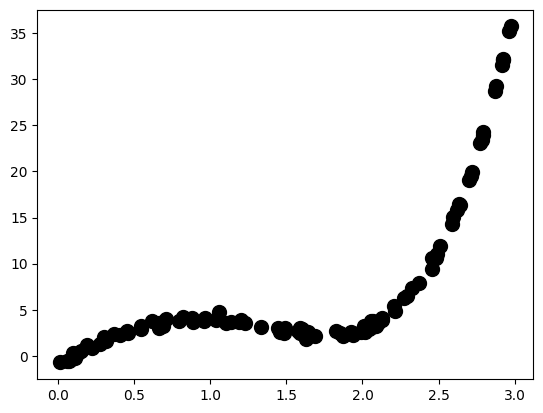

In [3]:
x = stats.uniform(0, 3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0, 0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(70,) (70,)
(30,) (30,)


In [5]:
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)

In [6]:
model2 = make_pipeline(PolynomialFeatures(125), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([35.21437617, 20.6499898 ,  3.97146845,  3.87062617, 19.53702899,
        3.87062617, 19.84455245,  3.87062617,  3.87062618,  3.87062617,
        3.87062617,  3.87062617,  3.87062617,  3.87062617,  3.87062617,
        3.87065374,  3.87062617,  3.87062617,  3.87062617,  3.87062617,
        3.87062617,  3.87062617,  3.90162368,  3.87062617,  3.87062799,
        3.87062617,  3.87062617,  3.87062617,  7.69324803,  3.87062617])

In [7]:
print('Explained variance score: {}'. format(metrics.explained_variance_score(y_test, model2.predict(X_test))))
print('Mediann absolute error: {}'. format(metrics.median_absolute_error(y_test, model2.predict(X_test))))
print('Mean squared error: {}'. format(metrics.mean_squared_error(y_test, model2.predict(X_test))))
print('Mean absolute errors: {}'. format(metrics.mean_absolute_error(y_test, model2.predict(X_test))))
print('Mean absolute percentage errors: {}'. format(metrics.mean_absolute_percentage_error(y_test, model2.predict(X_test))))

Explained variance score: 0.8488791772205491
Mediann absolute error: 1.2414978093768352
Mean squared error: 9.731772515869377
Mean absolute errors: 2.2078223330065323
Mean absolute percentage errors: 1.076290793170252


In [8]:
data = pd.read_csv('auto-mpg.csv')

In [9]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [11]:
data_only_cat = data.select_dtypes(include='object')
data_only_cat.head()

,horsepower,name
0,130,chevrolet chevelle malibu
1,165,buick skylark 320
2,150,plymouth satellite
3,150,amc rebel sst
4,140,ford torino


In [12]:
data_only_cat_dummies = pd.get_dummies(data_only_cat, drop_first=True, dtype=int)
data_only_cat_dummies

,horsepower_102,horsepower_103,horsepower_105,horsepower_107,horsepower_108,horsepower_110,horsepower_112,horsepower_113,horsepower_115,horsepower_116,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.drop(list(data_only_cat), axis=1, inplace=True)

In [14]:
# data = pd.concat([data, data_only_cat_dummies], axis=1)

In [15]:
data.head()

,mpg,cylinders,displacement,weight,acceleration,year,origin
0,18.0,8,307.0,3504,12.0,70,1
1,15.0,8,350.0,3693,11.5,70,1
2,18.0,8,318.0,3436,11.0,70,1
3,16.0,8,304.0,3433,12.0,70,1
4,17.0,8,302.0,3449,10.5,70,1


In [16]:
X = data.drop('mpg', axis=1)
y = data['mpg']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
model_mine = LinearRegression()
model_mine.fit(X_train, y_train)
model_mine.predict(X_test)
print('mean_absolute_percentege_erreors: {}'.format(metrics.mean_absolute_percentage_error(y_test, model_mine.predict(X_test))))

mean_absolute_percentege_erreors: 0.11593522115786499


In [21]:
model_mine_2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model_mine_2.fit(X_train, y_train)
model_mine_2.predict(X_test)
print('mean_absolute_percentege_erreors: {}'.format(metrics.mean_absolute_percentage_error(y_test, model_mine_2.predict(X_test))))

mean_absolute_percentege_erreors: 0.08977276030195952


In [22]:
model_mine_3 = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
model_mine_3.fit(X_train, y_train)
model_mine_3.predict(X_test)
print('mean_absolute_percentege_erreors: {}'.format(metrics.mean_absolute_percentage_error(y_test, model_mine_3.predict(X_test))))

mean_absolute_percentege_erreors: 0.10796036467060414


In [23]:
params2 = {'degree': [1, 2, 3, 4, 5, 25]}

In [26]:
grid_cv_model2 = GridSearchCV(estimator = PolynomialFeatures(), param_grid=params2, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
grid_cv_model2.fit(X_train, y_train)
grid_cv_model2.best_params_

C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in

{'degree': 1}

In [27]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)
pred_test = model.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [32]:
mape(y_test, pred_test)

0.11593522115786499

In [34]:
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train_poly, y_train)
pred_test = model.predict(X_test_poly)
mape(y_test, pred_test)

0.08977276030195952

In [35]:
pd.DataFrame(grid_cv_model2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001978,0.000416,0.000366,0.000316,1,{'degree': 1},NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001878,0.001992,0.000216,0.000432,2,{'degree': 2},NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.003343,0.004185,0.000000,0.000000,3,{'degree': 3},NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000676,0.001353,0.000000,0.000000,4,{'degree': 4},NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.002617,0.005233,0.000000,0.000000,5,{'degree': 5},NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000257,0.000513,0.000269,0.000537,25,{'degree': 25},NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
print(grid_cv_model2.scoring)

neg_mean_absolute_percentage_error


<function BaseSearchCV.score_samples at 0x000002C49F6B5EE0>
